## TP2: Análisis exploratorio de datos parte II
En este caso retomamos el análisis exploratorio de datos pero con un nivel más avanzado. Como discutimos previamente, se puede profundizar en distintas direcciones. Aquí nos concentraremos en el análisis descriptivo estadístico y su visualización. Como primer paso cargamos los paquetes:

In [15]:
import numpy as np # Para funciones de algebra lineal
import pandas as pd # Manejo general de los datos
import os
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
%matplotlib inline
sns.set_color_codes = True

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Pregunta, ¿Por qué esta vez no fue necesario instalar previamente algunos de los paquetes? Ahora montamos google drive y cargamos el archivo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

TP2_data = /content/drive/MyDrive/IMD/TP2/data.csv

Mounted at /content/drive


Ahora cargamos el archivo (recuenden revisar la ruta de acceso)

In [3]:
df = pd.read_csv (TP2_data)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Como siempre, mirar los datos

In [25]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Como veran, es más complejos que el anterior. Veamos los últimos valores también, pregunta ¿Con head() que se imprimía?

In [4]:
df.tail(5)  

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Ahora vamos a cambiar los nombres de las columnas, para simplificarlos

In [5]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Veamos la estructura de la base

In [6]:
df.shape

(11914, 16)

¿Qué quiere decir esto? ¿Qué conclusion hubiesen sacado si era (11914, 0) o (0,16)? Veamos si hay columnas duplicadas

## Mirar valores nulos, duplicados, errores, etc

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (715, 16)



Si las hay, las eliminamos con el siguiente comando:


In [8]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Ahora lo mismo con los valores nulos o NAs

In [9]:
df = df.dropna()    # Dropping valores nulos.
df.count()

Make                7735
Model               7735
Year                7735
Engine Fuel Type    7735
HP                  7735
Cylinders           7735
Transmission        7735
Drive Mode          7735
Number of Doors     7735
Market Category     7735
Vehicle Size        7735
Vehicle Style       7735
MPG-H               7735
MPG-C               7735
Popularity          7735
Price               7735
dtype: int64

## Análisis univariado y detección de outliers

Ahora haremos el primer boxplot (¿Qué era? Repasemos)
Un boxplot es una manera de mostrar información sobre un grupo de números. Imaginá que tenés una caja, dividida en tres partes por dos líneas. Esas líneas representan el valor medio y los cuartiles de los números. Los cuartiles dividen los números en cuatro partes iguales. El primer cuartil representa el 25% más bajo de los números, el segundo cuartil (la línea del medio) representa el 50% medio de los números, y el tercer cuartil representa el 75% más bajo de los números.

Los "bigotes" que salen de la caja representan los valores máximos y mínimos de los números, excepto por algunos valores extraños que pueden aparecer como puntos individuales fuera de los bigotes.

Entonces, para interpretar un boxplot, podés pensar en él como una caja con bigotes. La caja representa la mayoría de los números, y los bigotes muestran hasta dónde se extienden los números en ambas direcciones. Si hay puntos individuales fuera de los bigotes, podrían ser valores extraños que podrían ser outliers.

<Axes: xlabel='Price'>

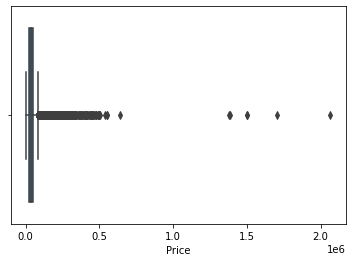

In [16]:
sns.boxplot(x=df['Price'])

Ahora para otras variables

<Axes: xlabel='HP'>

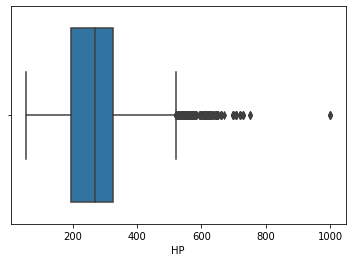

In [17]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

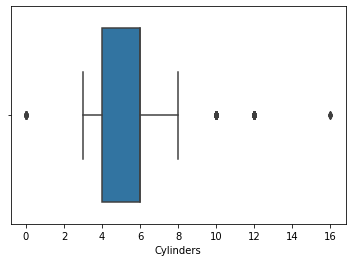

In [18]:
sns.boxplot(x=df['Cylinders'])

Vamos a prepararnos para detectar outliers, ¿Para qué servían los cuantiles en este caso?


In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


In [22]:
Q1


Year                2010.0
HP                   194.0
Cylinders              4.0
Number of Doors        2.0
MPG-H                 22.0
MPG-C                 16.0
Popularity           520.0
Price              26225.0
Name: 0.25, dtype: float64

Y ahora eliminamos los outliers

In [23]:
df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
df.shape

<ipython-input-23-2bf00df86226>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]


(5622, 16)

Ahora, con las cosas un poco más "limpias", vamos a una representación o tablero que describa los análisis fundamentales sobre las variables. Para esto importamos un sub paquete de pandas llamado pandas_profiling, utilizando la función ProfileReport, que genera un reporte bastante exhaustivo.

In [24]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

Ahora guardémoslo

In [28]:
report.to_file("/content/drive/MyDrive/IMD/TP2/Reporte.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## ¿Correlación?
Una de los factores que menciona el reporte es la correlación. Como vamos a ver más adelante, resulta muy importante para varios tipos de análisis. Vamos a hacer otro tipo de gráfico más detallado para estudiarla, en este caso analizamos correlación de pearson.

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.151051,-0.173957,0.121819,0.344971,0.320515,0.194030,0.224195
HP,0.151051,1.000000,0.772090,-0.038800,-0.558102,-0.646821,0.089515,0.757838
Cylinders,-0.173957,0.772090,1.000000,-0.002469,-0.709868,-0.749259,0.021924,0.518301
Number of Doors,0.121819,-0.038800,-0.002469,1.000000,-0.045712,0.003745,-0.098174,0.015691
MPG-H,0.344971,-0.558102,-0.709868,-0.045712,1.000000,0.924245,0.109159,-0.308098
MPG-C,0.320515,-0.646821,-0.749259,0.003745,0.924245,1.000000,0.062135,-0.381777
Popularity,0.194030,0.089515,0.021924,-0.098174,0.109159,0.062135,1.000000,0.141315
Price,0.224195,0.757838,0.518301,0.015691,-0.308098,-0.381777,0.141315,1.000000


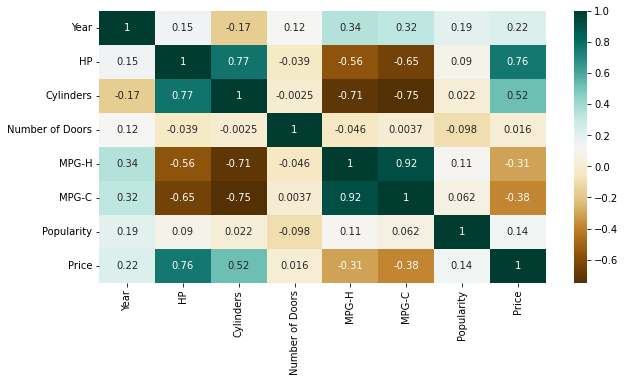

In [29]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c